In [3]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

#  Assignment 1 - Advance Machine Learning 159.738 

---

### Team members:
Ziyi Wang ID 18042783

## Content
* Loading datasets and resize data split to training and testing

---


#### Information about datasets
#### Labeled dogs and cats from Microsoft
* Dogs and Cats image https://www.microsoft.com/en-us/download/details.aspx?id=54765

In [22]:
#!pip install opencv-python

In [54]:
#!pip install tensorflow

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np
import patsy
import os
from PIL import Image 
import cv2
%matplotlib inline

In [21]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

ModuleNotFoundError: No module named 'tensorflow._api'

In [42]:
from pylab import rcParams

sns.set(style="ticks")
#sns.set_style("whitegrid")
rcParams['figure.dpi'] = 150
rcParams['lines.linewidth'] = 2
rcParams['axes.facecolor'] = 'white'
rcParams['patch.edgecolor'] = 'white'
rcParams['font.family'] = 'StixGeneral'
rcParams['figure.figsize'] = 10,8
rcParams['font.size'] = 14
rcParams['axes.labelsize'] = 'large'
rcParams['xtick.labelsize'] = 14
rcParams['ytick.labelsize'] = 14

pd.options.display.max_columns = 50

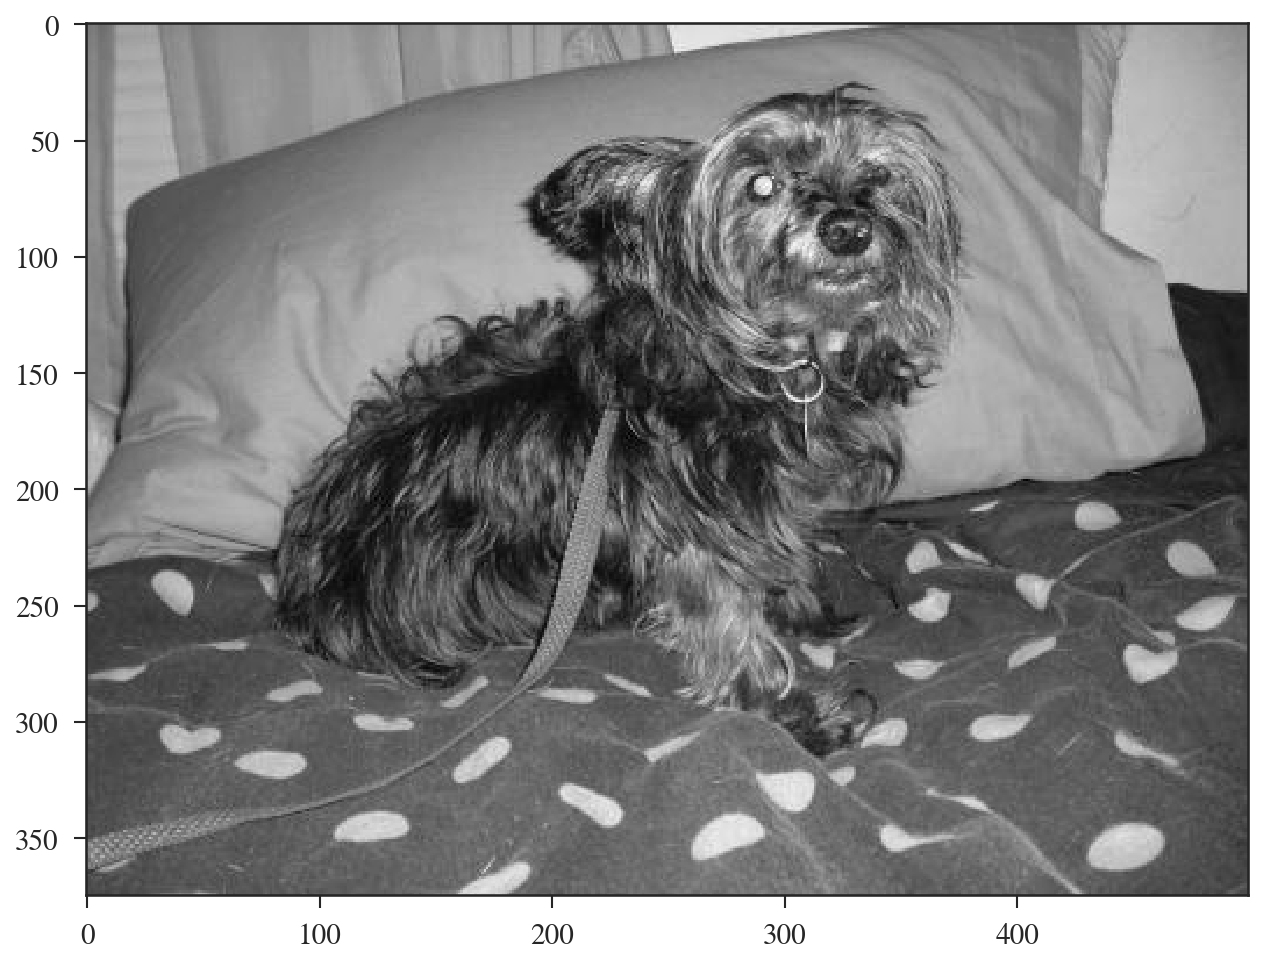

In [43]:
DATADIR = "F:/Advance Machine Learning/Assignment 1/machinelearning2019/PetImages"
CATEGORIES = ["Dog","Cat"]

for category in CATEGORIES:
    path = os.path.join(DATADIR, category)#path to cats or dogs dir
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)#read and make it to grey scale
        plt.imshow(img_array,cmap="gray")
        plt.show()
        break
    break
        

In [35]:
print(img_array)

[[117 117 119 ... 133 132 132]
 [118 117 119 ... 135 134 134]
 [119 118 120 ... 137 136 136]
 ...
 [ 79  74  73 ...  80  76  73]
 [ 78  72  69 ...  72  73  74]
 [ 74  71  70 ...  75  73  71]]


<function matplotlib.pyplot.show(*args, **kw)>

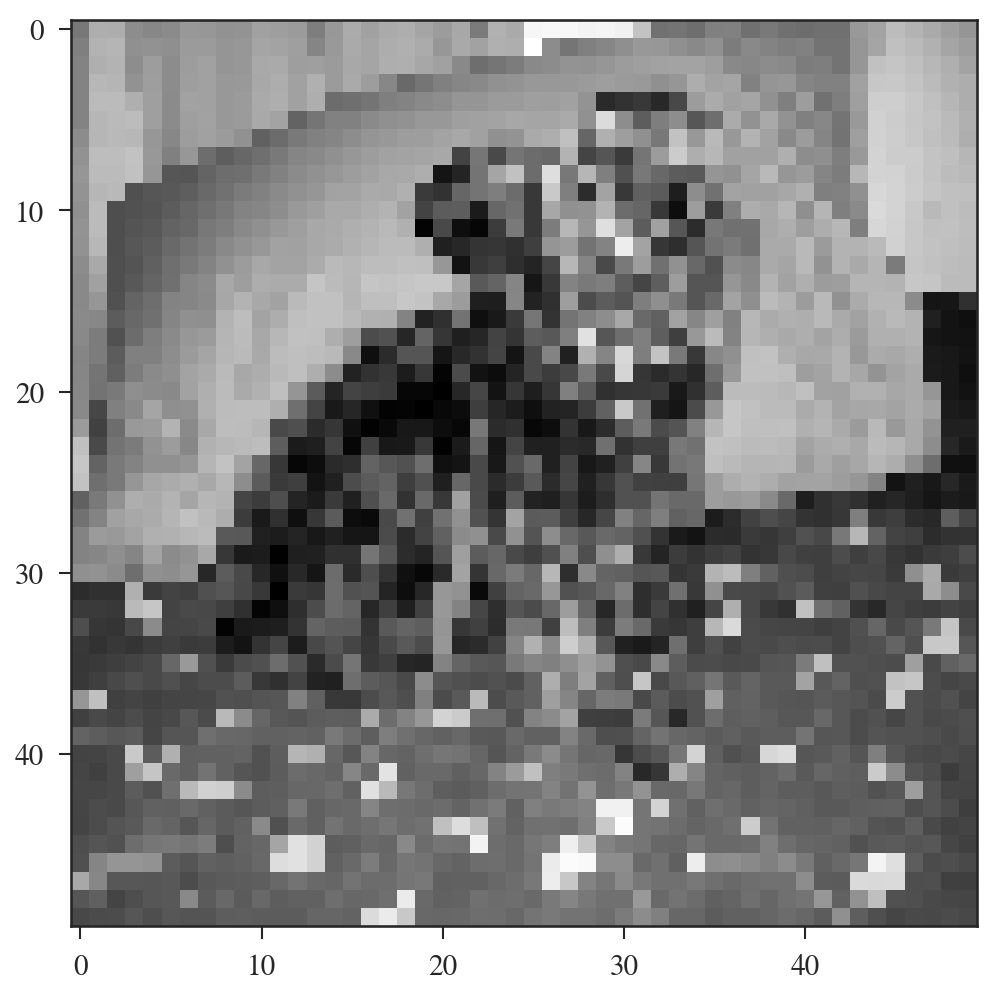

In [44]:
IMG_SIZE = 50

new_array = cv2.resize(img_array,(IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap = 'gray')
plt.show

In [60]:
training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        #conver the dog and cat to numerical value 0/1
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                #read and make it to grey scale
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                #resize operation
                new_array = cv2.resize(img_array,(IMG_SIZE, IMG_SIZE))
                #small image and classfication name to training data
                training_data.append([new_array, class_num])
            except Exception as e:
                pass#pass the image if they broken
create_training_data()

In [49]:
print(len(training_data))

24946


In [61]:
#seperate dataset
import random
random.shuffle(training_data)

In [65]:
for sample in training_data[:10]:
    print(sample[1])

0
1
1
0
0
1
1
1
0
0


In [66]:
#featurs set
X = []
#label
y = []

In [70]:
for features, label in training_data:
    X.append(features)
    y.append(label)
#conver numpy array in CNN network, -1 means how many featurs do we have and 1 means grey image
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [71]:
import pickle

pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [74]:
pickle_in = open("X.pickle", "rb")
X = pickle.load(pickle_in)

In [75]:
X[1]

array([[[232],
        [232],
        [232],
        ...,
        [227],
        [226],
        [225]],

       [[232],
        [232],
        [232],
        ...,
        [227],
        [226],
        [226]],

       [[232],
        [233],
        [233],
        ...,
        [227],
        [226],
        [226]],

       ...,

       [[162],
        [166],
        [146],
        ...,
        [  0],
        [  8],
        [ 15]],

       [[177],
        [168],
        [168],
        ...,
        [  2],
        [  3],
        [  7]],

       [[172],
        [172],
        [168],
        ...,
        [ 53],
        [ 70],
        [108]]], dtype=uint8)

after above one can do CNN model training

### CNN Network